In [2]:
import pandas as pd #pandas
import numpy as np #numpy
from numpy import set_printoptions
import matplotlib.pyplot as plt #matplotlib
import seaborn as sns #seaborn - heatmap
from sklearn import preprocessing #dataframe preprocessing
from sklearn.model_selection import train_test_split,cross_val_score #splitting data and cross val score
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix #accuracy score
from sklearn.tree import export_graphviz #tree png builder
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, chi2 #feature selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score,auc
from sklearn.naive_bayes import GaussianNB
from scipy.io import arff

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data into python
data = arff.loadarff('/Users/jasonmin/Downloads/autism/Autism-Child-Data.arff')

In [4]:
autism = pd.DataFrame(data[0])
#apply: autism = autism.select_dtypes([np.object])
#autism = autism.stack().str.decode('utf-8').unstack()
autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',...,b'm',b'?',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'?',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',...,b'f',b'?',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'?',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',...,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'


In [5]:
# Check the columns for NaN
autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    object 
 1   A2_Score         292 non-null    object 
 2   A3_Score         292 non-null    object 
 3   A4_Score         292 non-null    object 
 4   A5_Score         292 non-null    object 
 5   A6_Score         292 non-null    object 
 6   A7_Score         292 non-null    object 
 7   A8_Score         292 non-null    object 
 8   A9_Score         292 non-null    object 
 9   A10_Score        292 non-null    object 
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        292 non-null    object 
 13  jundice          292 non-null    object 
 14  austim           292 non-null    object 
 15  contry_of_res    292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result          

In [6]:
# Change '?' in ethnicity column to 'other'
autism = autism.rename(columns = {'austim':'autism'})
autism["ethnicity"].replace({"?": "other"}, inplace=True)
# 'age' column has NaNs -> change to 0
autism['age'] = autism['age'].fillna(0)
print(autism.head()) 

  A1_Score A2_Score A3_Score A4_Score A5_Score A6_Score A7_Score A8_Score  \
0     b'1'     b'1'     b'0'     b'0'     b'1'     b'1'     b'0'     b'1'   
1     b'1'     b'1'     b'0'     b'0'     b'1'     b'1'     b'0'     b'1'   
2     b'1'     b'1'     b'0'     b'0'     b'0'     b'1'     b'1'     b'1'   
3     b'0'     b'1'     b'0'     b'0'     b'1'     b'1'     b'0'     b'0'   
4     b'1'     b'1'     b'1'     b'1'     b'1'     b'1'     b'1'     b'1'   

  A9_Score A10_Score  ...  gender           ethnicity jundice autism  \
0     b'0'      b'0'  ...    b'm'           b'Others'   b'no'  b'no'   
1     b'0'      b'0'  ...    b'm'  b'Middle Eastern '   b'no'  b'no'   
2     b'0'      b'0'  ...    b'm'                b'?'   b'no'  b'no'   
3     b'0'      b'1'  ...    b'f'                b'?'  b'yes'  b'no'   
4     b'1'      b'1'  ...    b'm'           b'Others'  b'yes'  b'no'   

      contry_of_res used_app_before result       age_desc   relation Class/ASD  
0         b'Jordan'    

In [7]:
# Create function to transform non interger features using LabelEncoder
def encode_features(dataframe):
    features = list(autism.columns)
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataframe[feature])
        dataframe[feature] = le.transform(dataframe[feature])
    
    return dataframe

# Use above function to encode each features for the dataframe 'autism'. Create new dataframe called 'autism_df'
autism_df = encode_features(autism)
autism_df.head().T

,0,1,2,3,4
A1_Score,1,1,1,0,1
A2_Score,1,1,1,1,1
A3_Score,0,0,0,0,1
A4_Score,0,0,0,0,1
A5_Score,1,1,0,1,1
A6_Score,1,1,1,1,1
A7_Score,0,0,1,0,1
A8_Score,1,1,1,0,1
A9_Score,0,0,0,0,1
A10_Score,0,0,0,1,1


array([[<AxesSubplot:title={'center':'A1_Score'}>,
        <AxesSubplot:title={'center':'A2_Score'}>,
        <AxesSubplot:title={'center':'A3_Score'}>,
        <AxesSubplot:title={'center':'A4_Score'}>,
        <AxesSubplot:title={'center':'A5_Score'}>],
       [<AxesSubplot:title={'center':'A6_Score'}>,
        <AxesSubplot:title={'center':'A7_Score'}>,
        <AxesSubplot:title={'center':'A8_Score'}>,
        <AxesSubplot:title={'center':'A9_Score'}>,
        <AxesSubplot:title={'center':'A10_Score'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'ethnicity'}>,
        <AxesSubplot:title={'center':'jundice'}>,
        <AxesSubplot:title={'center':'autism'}>],
       [<AxesSubplot:title={'center':'contry_of_res'}>,
        <AxesSubplot:title={'center':'used_app_before'}>,
        <AxesSubplot:title={'center':'result'}>,
        <AxesSubplot:title={'center':'age_desc'}>,
        <AxesSubplot:title

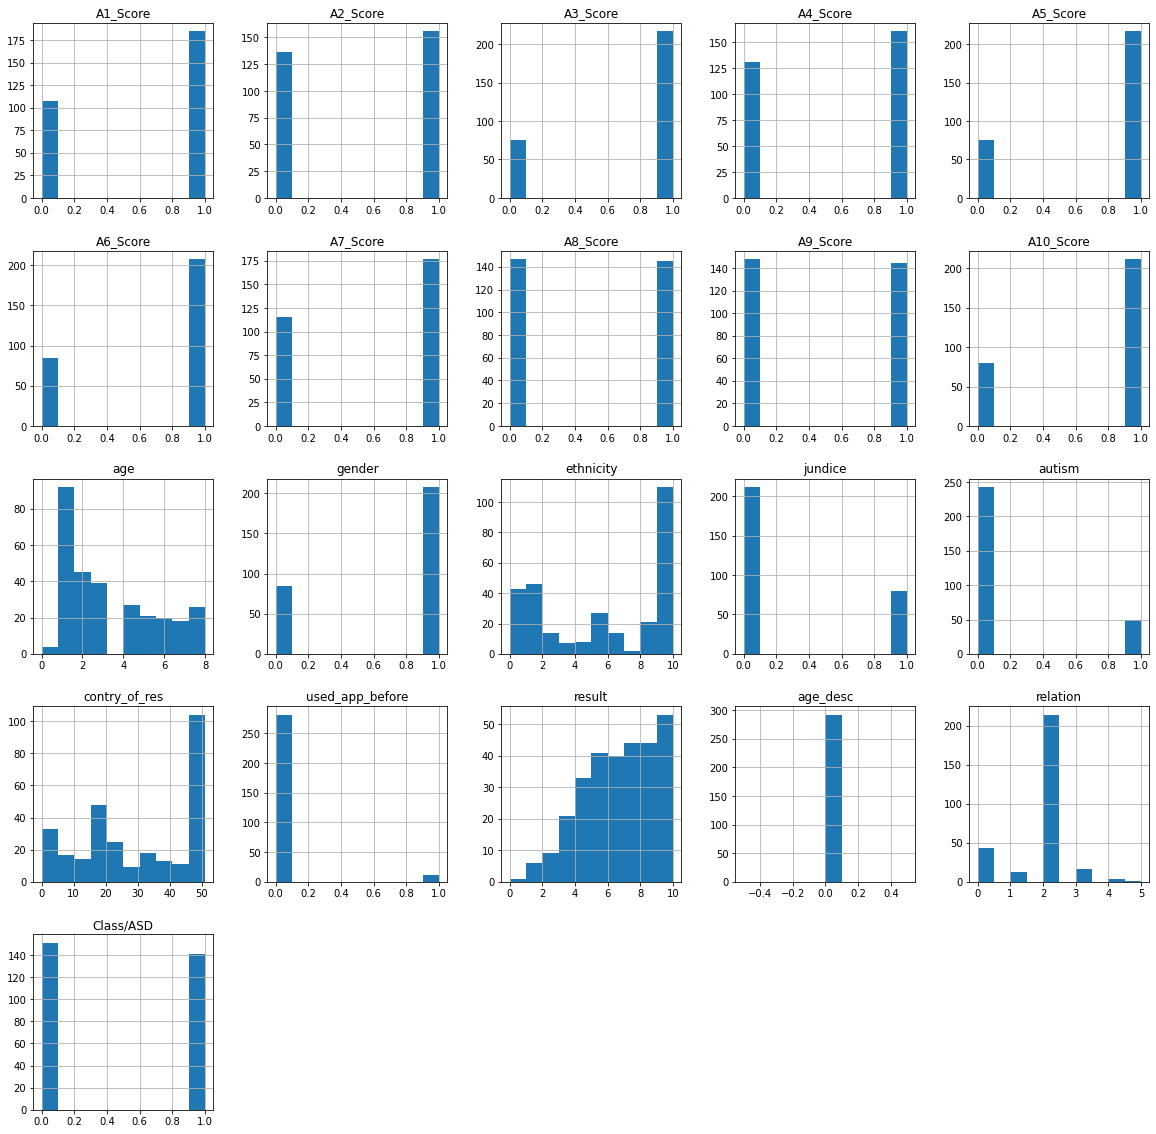

In [18]:
# Visualise datset
autism_df.hist(figsize = (20,20))

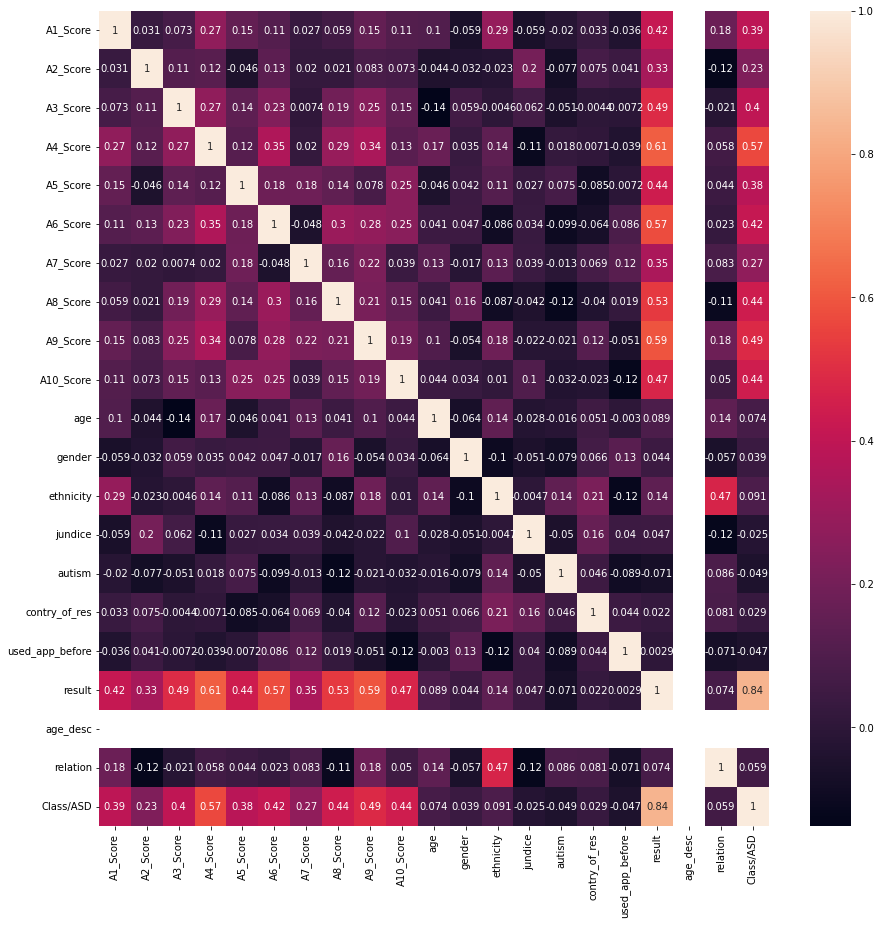

Class/ASD    1.000000
result       0.835869
A4_Score     0.568502
A9_Score     0.486163
A10_Score    0.439942
A8_Score     0.438389
A6_Score     0.417271
Name: Class/ASD, dtype: float64


In [9]:
# Correlation matrix
correlation = autism_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True)
plt.show()
# top 6 values of the correlation values (including 'Class/ASD' itself)
corr_value = abs(correlation['Class/ASD'])
print(corr_value.sort_values(ascending=False).head(7))

In [10]:
array = autism_df.values # assign features and outcomes as arrays for use
features = abs(array[:,0:-1]) # features has to be absolute values for this purpose as it contains negative values
outcome = array[:,-1]

# Set up chi2 test for selecting 5 most influential features
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(features, outcome)

# summarize scores
set_printoptions(precision=3)
print(fit.scores_) #check output

# The above visualisation is hard to read therefore we need more table-like output
features_column = pd.DataFrame(autism_df.columns) # feature names to dataframe
features_scores = pd.DataFrame(fit.scores_) # scores to dataframe
kbest_features = pd.concat([features_scores,features_column],axis=1) # combine the two dataframes
kbest_features.columns = ['score','feature'] # assigne column names

kbest_features
print(kbest_features.nlargest(5,'score')) # print top 5 features



[1.657e+01 7.135e+00 1.173e+01 4.234e+01 1.082e+01 1.463e+01 8.631e+00
 2.825e+01 3.498e+01 1.548e+01 2.704e+00 1.263e-01 7.140e+00 1.330e-01
 5.787e-01 2.461e+00 6.263e-01 1.701e+02       nan 4.142e-01]
         score   feature
17  170.110548    result
3    42.338541  A4_Score
8    34.980461  A9_Score
7    28.251186  A8_Score
0    16.570951  A1_Score


In [11]:
# Create new dataframe with the selected features
autism_selected = autism_df[['A4_Score','A9_Score','A8_Score','A10_Score','A1_Score','Class/ASD']]
print(autism_selected)
# Create a list of the column names for the features
feature_autism_names = list(autism_selected.drop('Class/ASD',axis=1))
print(feature_autism_names)

     A4_Score  A9_Score  A8_Score  A10_Score  A1_Score  Class/ASD
0           0         0         1          0         1          0
1           0         0         1          0         1          0
2           0         0         1          0         1          0
3           0         0         0          1         0          0
4           1         1         1          1         1          1
..        ...       ...       ...        ...       ...        ...
287         1         1         1          1         1          1
288         0         0         0          1         1          0
289         1         0         0          1         1          1
290         0         1         1          1         1          1
291         0         0         0          0         0          0

[292 rows x 6 columns]
['A4_Score', 'A9_Score', 'A8_Score', 'A10_Score', 'A1_Score']


In [12]:
# split data
# Run NB to test
nb_clf = GaussianNB()

y_autism_df = autism_selected['Class/ASD'] # 'Class/ASD' is the output 
x_autism_df = autism_selected.drop('Class/ASD',axis=1) #x is the traning features, everything except 'Class/ASD'
# Dataframe split into training and testing sets. Testing size has been assigned 0.2
X_train, X_test, y_train, y_test, = train_test_split(x_autism_df, y_autism_df, test_size = 0.2, random_state=31)

nb_clf.fit(X_train, y_train) #use training dataset to fit the model

autism_pred = nb_clf.predict(X_test) #create predicted outcome using test dataset
print('NB Accuracy: {0:.4f}'.format(accuracy_score(y_test, autism_pred))) #display accuracy

# cross validate score using 10-fold
score = cross_val_score(nb_clf, x_autism_df, y_autism_df, cv=10)
for iter_count, accuracy in enumerate(score):
    print("Cross Validation {0} Accuracy: {1:.4f}".format(iter_count, accuracy))

print("Mean Accuracy: {0:.4f}".format(np.mean(score)))

NB Accuracy: 0.7797
Cross Validation 0 Accuracy: 0.9000
Cross Validation 1 Accuracy: 0.9000
Cross Validation 2 Accuracy: 0.8966
Cross Validation 3 Accuracy: 0.8621
Cross Validation 4 Accuracy: 0.8621
Cross Validation 5 Accuracy: 1.0000
Cross Validation 6 Accuracy: 0.8276
Cross Validation 7 Accuracy: 0.7931
Cross Validation 8 Accuracy: 0.7931
Cross Validation 9 Accuracy: 0.8966
Mean Accuracy: 0.8731


                   0          1  accuracy  macro avg  weighted avg
precision   0.826087   0.615385  0.779661   0.720736      0.768947
recall      0.883721   0.500000  0.779661   0.691860      0.779661
f1-score    0.853933   0.551724  0.779661   0.702828      0.771978
support    43.000000  16.000000  0.779661  59.000000     59.000000
[[38  5]
 [ 8  8]]


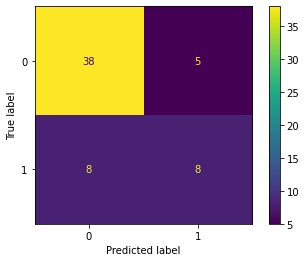

In [13]:
# Create confusion matrix for NB algorithm
c_report = pd.DataFrame(classification_report(y_test, autism_pred, target_names=['0', '1'],output_dict=True)) # see precision, recall
print(c_report)
print(confusion_matrix(y_test, autism_pred, labels=[0, 1])) # confusion matrix
plot_confusion_matrix(nb_clf, X_test, y_test) # visualise the confusion matrix

In [14]:
# decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=33, max_depth=3)

dt_clf.fit(X_train, y_train) #use training dataset to fit the model

autism_pred_dt = dt_clf.predict(X_test) #create predicted outcome using test dataset
print('DecisionTreeClassifier Accuracy: {0:.4f}'.format(accuracy_score(y_test, autism_pred_dt))) #display accuracy

score = cross_val_score(dt_clf, x_autism_df, y_autism_df, cv=10)
for iter_count, accuracy in enumerate(score):
    print("Cross Validation {0} Accuracy: {1:.4f}".format(iter_count, accuracy))

print("Mean Accuracy: {0:.4f}".format(np.mean(score)))

DecisionTreeClassifier Accuracy: 0.7966
Cross Validation 0 Accuracy: 0.9000
Cross Validation 1 Accuracy: 0.9000
Cross Validation 2 Accuracy: 0.8966
Cross Validation 3 Accuracy: 0.8621
Cross Validation 4 Accuracy: 0.8966
Cross Validation 5 Accuracy: 0.8621
Cross Validation 6 Accuracy: 0.7241
Cross Validation 7 Accuracy: 0.7931
Cross Validation 8 Accuracy: 0.8621
Cross Validation 9 Accuracy: 0.8276
Mean Accuracy: 0.8524


                   0          1  accuracy  macro avg  weighted avg
precision   0.844444   0.642857   0.79661   0.743651      0.789777
recall      0.883721   0.562500   0.79661   0.723110      0.796610
f1-score    0.863636   0.600000   0.79661   0.731818      0.792142
support    43.000000  16.000000   0.79661  59.000000     59.000000
[[38  5]
 [ 7  9]]


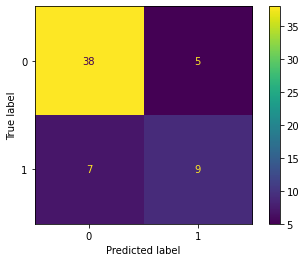

In [15]:
# Create confusion matrix for Decision Tree
c_report_dt = pd.DataFrame(classification_report(y_test, autism_pred_dt, target_names=['0', '1'],output_dict=True)) # see precision, recall
print(c_report_dt)
print(confusion_matrix(y_test, autism_pred_dt, labels=[0, 1])) # confusion matrix
plot_confusion_matrix(dt_clf, X_test, y_test) # visualise the confusion matrix

           importance
A4_Score     0.523102
A10_Score    0.235494
A9_Score     0.135311
A1_Score     0.057561
A8_Score     0.048533


<AxesSubplot:ylabel='importance'>

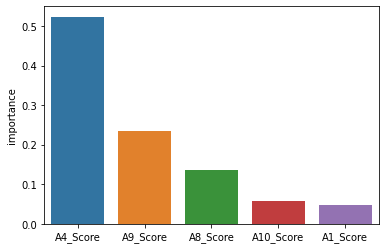

In [16]:
# create importances list
importances = dt_clf.feature_importances_
# create dataframe and match with feature names for reference
forest_importances = pd.DataFrame(importances, index=feature_autism_names)
forest_importances.columns = ['importance']

# Check importance score in a table
print(forest_importances.sort_values('importance',ascending=False))

# Plot the feature importance
sns.barplot(x=forest_importances.index, y=forest_importances.sort_values('importance',ascending=False).importance, data=forest_importances)
